In [2]:
import lhapdf
#import ROOT
import math
import json
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

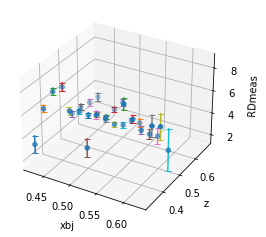

<Figure size 432x288 with 0 Axes>

In [3]:

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
with open('yield_ratio_xz_combined_weighted.json') as j_RD:
    RDxz = json.load(j_RD)
zs = []
xs = []
RDs = []
RDs_error = []
for key_xbj,xbj_value in RDxz["5.500000"].items():
    xbj = float(key_xbj) 
    for key_z,z_value in xbj_value.items():
        xs.append(xbj)
        z_hadron = float(key_z)
        zs.append(z_hadron)
        RD=float(z_value["value_ratio"])
        RD_error = float(z_value["error_ratio"])
        RDs.append(float(z_value["value_ratio"]))
        RDs_error.append(float(z_value["error_ratio"]))
        ax.plot([xbj,xbj],[z_hadron,z_hadron],[RD+RD_error,RD-RD_error],marker="_")
ax.scatter(xs,zs,RDs)
ax.set_xlabel("xbj")
ax.set_ylabel("z")
ax.set_zlabel("RDmeas")
plt.show()
plt.savefig("RD_xbj_z")

4.0


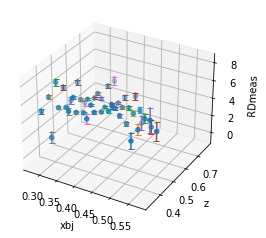

4.75


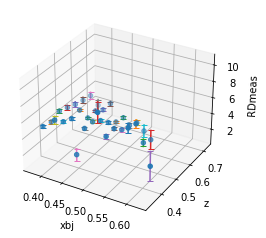

5.5


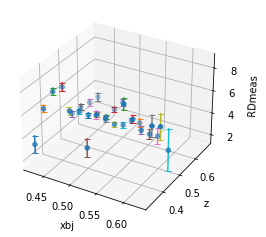

In [4]:
for key_Q2,Q2_value in RDxz.items():
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')
    zs = []
    xs = []
    RDs = []
    RDs_error = []
    Q2 = float(key_Q2)
    print(Q2)
    for key_xbj,xbj_value in Q2_value.items():
        xbj = float(key_xbj) 
        for key_z,z_value in xbj_value.items():
            xs.append(xbj)
            z_hadron = float(key_z)
            zs.append(z_hadron)
            RD=float(z_value["value_ratio"])
            RD_error = float(z_value["error_ratio"])
            RDs.append(float(z_value["value_ratio"]))
            RDs_error.append(float(z_value["error_ratio"]))
            ax.plot([xbj,xbj],[z_hadron,z_hadron],[RD+RD_error,RD-RD_error],marker="_")
    ax.scatter(xs,zs,RDs)
    ax.set_xlabel("xbj")
    ax.set_ylabel("z")
    ax.set_zlabel("RDmeas")
    plt.show()

LHAPDF 6.3.0 loading /Users/shuojia/CSV/lhapdf/build/share/LHAPDF/cteq6l1/cteq6l1_0000.dat
cteq6l1 PDF set, member #0, version 4; LHAPDF ID = 10042
LHAPDF 6.3.0 loading /Users/shuojia/CSV/lhapdf/build/share/LHAPDF/cteq6l1/cteq6l1_0000.dat
cteq6l1 PDF set, member #0, version 4; LHAPDF ID = 10042


/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_37716/2812604060.py:59: IMinuitWarning: errordef not set, using 1 (appropriate for least-squares)
  m_Q2.migrad()
No handles with labels found to put in legend.


0.1480593138634998 1.0085715559838337 -0.7023314876160099 3.562609593891119 1.620263942012944 1.6853745442421735 0.922065671464294 -11.716544593452722 0.419414905336385
['$\\chi^2$ / $n_\\mathrm{dof}$ = 347.2 / 37']


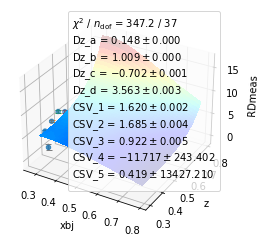

In [5]:
## Getting a PDF member object
p_cteq6 = lhapdf.mkPDF("cteq6l1", 0)
p_cteq6 = lhapdf.mkPDF("cteq6l1/0")
from iminuit import Minuit
def Bx(xbj,Q,p_cteq6):
    return 2.5+5*(p_cteq6.xfxQ(-2,xbj,Q)+p_cteq6.xfxQ(-1,xbj,Q))/(p_cteq6.xfxQ(1,xbj,Q)+p_cteq6.xfxQ(2,xbj,Q))
def Ax(xbj,Q,p_cteq6):
    return -4/(3*(p_cteq6.xfxQ(2,xbj,Q)+p_cteq6.xfxQ(1,xbj,Q)))
def RDmeas_CSV(Q,z_had,Dz_a,Dz_b,Dz_c,Dz_d,xbj,CSV_1,CSV_2,CSV_3,CSV_4,CSV_5):
    #delta_z = a+b*z_had
    #delta_z = a+b*z_had/(1+z_had)
    #delta_z = z_had**a*(1-z_had)**b
    delta_z = z_had**Dz_a*(1-z_had)**Dz_b*(1+Dz_c*(1-z_had)**Dz_d)
    Dz = (1-delta_z)/(1+delta_z)
    CSVx = xbj**CSV_1*(1-xbj)**CSV_2*math.exp(CSV_3*xbj)*(1+math.exp(CSV_4)*xbj)**CSV_5 
    Bx = 2.5+5*(p_cteq6.xfxQ(-2,xbj,Q)+p_cteq6.xfxQ(-1,xbj,Q))/(p_cteq6.xfxQ(1,xbj,Q)+p_cteq6.xfxQ(2,xbj,Q))
    Ax = -4/(3*(p_cteq6.xfxQ(2,xbj,Q)+p_cteq6.xfxQ(1,xbj,Q)))
    return (Bx-Ax*CSVx)/Dz-2.5
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
#with open('yield_ratio_xz_combined_weighted.json') as j_RD:
#    RDxz = json.load(j_RD)
zs = []
xs = []
RDs = []
RDs_error = []

for key_xbj,xbj_value in RDxz["4.000000"].items():
    xbj = float(key_xbj) 
    for key_z,z_value in xbj_value.items():
        xs.append(xbj)
        z_hadron = float(key_z)
        zs.append(z_hadron)
        RD=float(z_value["value_ratio"])
        RD_error = float(z_value["error_ratio"])
        RDs.append(float(z_value["value_ratio"]))
        RDs_error.append(float(z_value["error_ratio"]))
        ax.plot([xbj,xbj],[z_hadron,z_hadron],[RD+RD_error,RD-RD_error],marker="_")
        
ax.scatter(xs,zs,RDs)
ax.set_xlabel("xbj")
ax.set_ylabel("z")
ax.set_zlabel("RDmeas")
def least_squares_Q2(Dz_a,Dz_b,Dz_c,Dz_d,CSV_1,CSV_2,CSV_3,CSV_4,CSV_5):
    least_square = 0
    for key_xbj,xbj_value in RDxz["4.000000"].items():
        xbj = float(key_xbj) 
        Q = 2
        for key_z,z_value in xbj_value.items():
            
            z_hadron = float(key_z)
        
            RD=float(z_value["value_ratio"])
            RD_error = float(z_value["error_ratio"])
            least_square += (RD-RDmeas_CSV(Q,z_hadron,Dz_a,Dz_b,Dz_c,Dz_d,xbj,CSV_1,CSV_2,CSV_3,CSV_4,CSV_5)) ** 2 / RD_error**2
    return least_square
m_Q2 = Minuit(least_squares_Q2,0.2,1,0,0,0,0,0,0,0)
#m_Q2 = Minuit(least_squares_Q2,0.73,-0.61,0.1,0.1,error_a = 0.05,error_b = 0.05,errordef=1)
m_Q2.migrad()
m_Q2.hesse()
print(*m_Q2.values)
#print(m_Q2.values["a"])
Dz_as = m_Q2.values["Dz_a"]
Dz_bs = m_Q2.values["Dz_b"]
Dz_cs = m_Q2.values["Dz_c"]
Dz_ds = m_Q2.values["Dz_d"]
CSV_1s = m_Q2.values["CSV_1"]
CSV_2s = m_Q2.values["CSV_2"]
CSV_3s = m_Q2.values["CSV_3"]
CSV_4s = m_Q2.values["CSV_4"]
CSV_5s = m_Q2.values["CSV_5"]

x = np.arange(0.3,0.8,0.01)
y = np.arange(0.3,0.8,0.01)
#x = np.array(xs)
#y = np.array(zs)
fit_RDmeas=[]
for xbj in x:
    fit_RDmeas_zi = []
    for zi in y:
        #fit_RDmeas_zi.append()
        fit_RDmeas.append(RDmeas_CSV(2,zi,m_Q2.values["Dz_a"],m_Q2.values["Dz_b"],m_Q2.values["Dz_c"],m_Q2.values["Dz_d"],xbj,m_Q2.values["CSV_1"],m_Q2.values["CSV_2"],m_Q2.values["CSV_3"],m_Q2.values["CSV_4"],m_Q2.values["CSV_5"]))
X,Y = np.meshgrid(x,y)
Z = np.reshape(fit_RDmeas,X.shape)
ax.plot_surface(X,Y,Z,rstride=1,cstride=1,cmap=plt.cm.jet,linewidth=0,antialiased=False)
#plt.plot(zs,fit_RDmeas,label = "fit")
#print(xs) 
#print(zs)
fit_info = [
    f"$\\chi^2$ / $n_\\mathrm{{dof}}$ = {m_Q2.fval:.1f} / {len(zs) - m_Q2.nfit}",
]
print(fit_info)
for p, v, e in zip(m_Q2.parameters, m_Q2.values, m_Q2.errors):
    fit_info.append(f"{p} = ${v:.3f} \\pm {e:.3f}$")
plt.legend(title="\n".join(fit_info))

     
plt.show()

4.0


/var/folders/ll/8_2_l77j4yl2zjb6stl8d9b00000gn/T/ipykernel_37716/3397634731.py:62: IMinuitWarning: errordef not set, using 1 (appropriate for least-squares)
  m_Q2.migrad()
No handles with labels found to put in legend.


0.1480593138634998 1.0085715559838337 -0.7023314876160099 3.562609593891119 1.620263942012944 1.6853745442421735 0.922065671464294 -11.716544593452722 0.419414905336385
['$\\chi^2$ / $n_\\mathrm{dof}$ = 347.2 / 37']


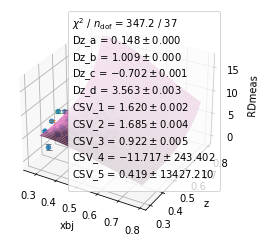

4.75


No handles with labels found to put in legend.


0.32790082503168505 1.282027037901485 -0.17449076102471045 89.85442806800056 1.5917051093142331 12.056191881309951 16.713901954504326 -74.74648101976604 -0.921200384364101
['$\\chi^2$ / $n_\\mathrm{dof}$ = 176.5 / 26']


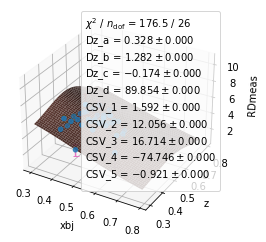

5.5


No handles with labels found to put in legend.


-1.5764780535252292 4.2806597384928216 -10.345158712859167 6.170596238607188 -9.553670265900656 10.925549041600373 43.595475171992945 6.380537711410999 -3.720391469025234
['$\\chi^2$ / $n_\\mathrm{dof}$ = 55.8 / 21']


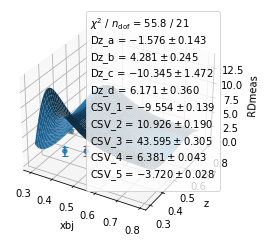

In [6]:
import math
Dz_as = []
Dz_bs = []
Dz_cs = []
Dz_ds = []
CSV_1s = []
CSV_2s = []
CSV_3s = []
CSV_4s = []
CSV_5s = []
Dz_a_err = []
Dz_b_err = []
Dz_c_err = []
Dz_d_err = []
CSV_1_err = []
CSV_2_err = []
CSV_3_err = []
CSV_4_err = []
CSV_5_err = []
kaisquare = []
Qs = []
for key_Q2,Q2_value in RDxz.items():
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')
    zs = []
    xs = []
    RDs = []
    RDs_error = []
    Q2 = float(key_Q2)
    Qs.append(Q2)
    print(Q2)
    for key_xbj,xbj_value in Q2_value.items():
        xbj = float(key_xbj) 
        for key_z,z_value in xbj_value.items():
            xs.append(xbj)
            z_hadron = float(key_z)
            zs.append(z_hadron)
            RD=float(z_value["value_ratio"])
            RD_error = float(z_value["error_ratio"])
            RDs.append(float(z_value["value_ratio"]))
            RDs_error.append(float(z_value["error_ratio"]))
            ax.plot([xbj,xbj],[z_hadron,z_hadron],[RD+RD_error,RD-RD_error],marker="_")
    ax.scatter(xs,zs,RDs)
    ax.set_xlabel("xbj")
    ax.set_ylabel("z")
    ax.set_zlabel("RDmeas")
    def least_squares_Q2(Dz_a,Dz_b,Dz_c,Dz_d,CSV_1,CSV_2,CSV_3,CSV_4,CSV_5):
        least_square = 0
        for key_xbj,xbj_value in Q2_value.items():
            xbj = float(key_xbj) 
            Q = math.sqrt(Q2)
            for key_z,z_value in xbj_value.items():
            
                z_hadron = float(key_z)
        
                RD=float(z_value["value_ratio"])
                RD_error = float(z_value["error_ratio"])
                least_square += (RD-RDmeas_CSV(Q,z_hadron,Dz_a,Dz_b,Dz_c,Dz_d,xbj,CSV_1,CSV_2,CSV_3,CSV_4,CSV_5)) ** 2 / RD_error**2
        return least_square
    m_Q2 = Minuit(least_squares_Q2,0.2,1,0,0,0,0,0,0,0)
    #m_Q2 = Minuit(least_squares_Q2,0.73,-0.61,0.1,0.1,error_a = 0.05,error_b = 0.05,errordef=1)
    m_Q2.migrad()
    m_Q2.hesse()
    print(*m_Q2.values)
    #print(m_Q2.values["a"])
    Dz_as.append(m_Q2.values["Dz_a"])
    Dz_bs.append(m_Q2.values["Dz_b"])
    Dz_cs.append(m_Q2.values["Dz_c"])
    Dz_ds.append(m_Q2.values["Dz_d"])
    CSV_1s.append(m_Q2.values["CSV_1"])
    CSV_2s.append(m_Q2.values["CSV_2"])
    CSV_3s.append(m_Q2.values["CSV_3"])
    CSV_4s.append(m_Q2.values["CSV_4"])
    CSV_5s.append(m_Q2.values["CSV_5"])
    Dz_a_err.append(m_Q2.errors["Dz_a"])
    Dz_b_err.append(m_Q2.errors["Dz_b"])
    Dz_c_err.append(m_Q2.errors["Dz_c"])
    Dz_d_err.append(m_Q2.errors["Dz_d"])
    CSV_1_err.append(m_Q2.errors["CSV_1"])
    CSV_2_err.append(m_Q2.errors["CSV_2"])
    CSV_3_err.append(m_Q2.errors["CSV_3"])
    CSV_4_err.append(m_Q2.errors["CSV_4"])
    CSV_5_err.append(m_Q2.errors["CSV_5"])
    kaisquare.append(m_Q2.fval)

    x = np.arange(0.3,0.8,0.01)
    y = np.arange(0.3,0.8,0.01)
    #x = np.array(xs)
    #y = np.array(zs)
    fit_RDmeas=[]
    for xbj in x:
        fit_RDmeas_zi = []
        for zi in y:
            #fit_RDmeas_zi.append()
            fit_RDmeas.append(RDmeas_CSV(math.sqrt(Q2),zi,m_Q2.values["Dz_a"],m_Q2.values["Dz_b"],m_Q2.values["Dz_c"],m_Q2.values["Dz_d"],xbj,m_Q2.values["CSV_1"],m_Q2.values["CSV_2"],m_Q2.values["CSV_3"],m_Q2.values["CSV_4"],m_Q2.values["CSV_5"]))
    X,Y = np.meshgrid(x,y)
    Z = np.reshape(fit_RDmeas,X.shape)
    ax.plot_surface(X,Y,Z)
    #ax.plot_surface(X,Y,Z,rstride=1,cstride=1,cmap=plt.cm.jet,linewidth=0,antialiased=False)
    #plt.plot(zs,fit_RDmeas,label = "fit")
    #print(xs) 
    #print(zs)
    fit_info = [
        f"$\\chi^2$ / $n_\\mathrm{{dof}}$ = {m_Q2.fval:.1f} / {len(zs) - m_Q2.nfit}",
    ]
    print(fit_info)
    for p, v, e in zip(m_Q2.parameters, m_Q2.values, m_Q2.errors):
        fit_info.append(f"{p} = ${v:.3f} \\pm {e:.3f}$")
    plt.legend(title="\n".join(fit_info))

     
    plt.show()
  

4.0
4.75
5.5


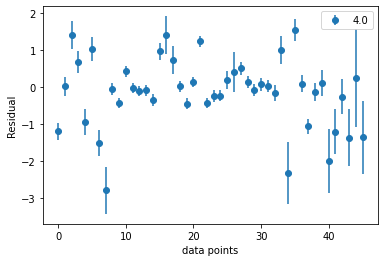

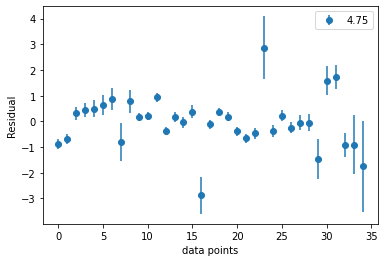

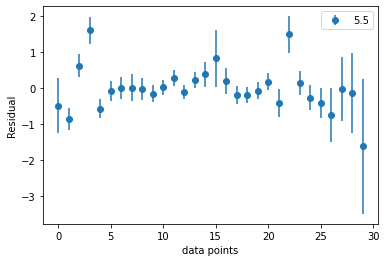

In [7]:
i_Q2 = 0

for key_Q2,Q2_value in RDxz.items():
    fig = plt.figure()
    
    zs = []
    xs = []
    RDs = []
    RDs_error = []
    Q2 = float(key_Q2)
    #Qs.append(Q2)
    print(Q2)
    i_count = 0
    Residual = []
    Residual_count = []
    Residual_error = []
    for key_xbj,xbj_value in Q2_value.items():
        xbj = float(key_xbj) 
        for key_z,z_value in xbj_value.items():
            xs.append(xbj)
            z_hadron = float(key_z)
            zs.append(z_hadron)
            RD=float(z_value["value_ratio"])
            RD_error = float(z_value["error_ratio"])
            Residual_error.append(RD_error)
        
            RDmeas_CSV_fit = RDmeas_CSV(math.sqrt(Q2),z_hadron,Dz_as[i_Q2],Dz_bs[i_Q2],Dz_cs[i_Q2],Dz_ds[i_Q2],xbj,CSV_1s[i_Q2],CSV_2s[i_Q2],CSV_3s[i_Q2],CSV_4s[i_Q2],CSV_5s[i_Q2])
            Residual.append(RD-RDmeas_CSV_fit)
            Residual_count.append(i_count)
            i_count+=1
  
    #plt.plot(Residual_count,Residual,"P",label=Qs[i_Q2])
    plt.errorbar(Residual_count,Residual,Residual_error,fmt='o',label = Qs[i_Q2])
    plt.xlabel("data points")
    plt.ylabel("Residual")
    plt.legend()
    i_Q2+=1

4.0
4.75
5.5


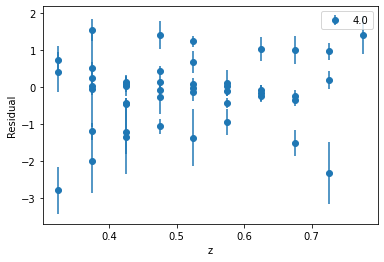

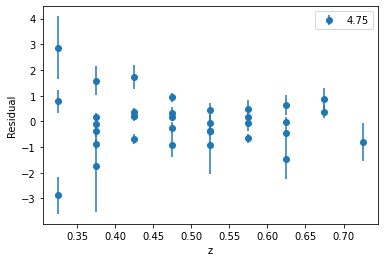

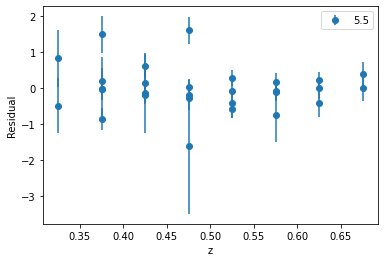

In [8]:
i_Q2 = 0

for key_Q2,Q2_value in RDxz.items():
    fig = plt.figure()
    
    zs = []
    xs = []
    RDs = []
    RDs_error = []
    Q2 = float(key_Q2)
   
    print(Q2)
    i_count = 0
    Residual = []
    Residual_count = []
    Residual_error = []
    for key_xbj,xbj_value in Q2_value.items():
        xbj = float(key_xbj) 
        for key_z,z_value in xbj_value.items():
            xs.append(xbj)
            z_hadron = float(key_z)
            zs.append(z_hadron)
            RD=float(z_value["value_ratio"])
            RD_error = float(z_value["error_ratio"])
            Residual_error.append(RD_error)
           
            RDmeas_CSV_fit = RDmeas_CSV(math.sqrt(Q2),z_hadron,Dz_as[i_Q2],Dz_bs[i_Q2],Dz_cs[i_Q2],Dz_ds[i_Q2],xbj,CSV_1s[i_Q2],CSV_2s[i_Q2],CSV_3s[i_Q2],CSV_4s[i_Q2],CSV_5s[i_Q2])
            Residual.append(RD-RDmeas_CSV_fit)
            Residual_count.append(i_count)
            i_count+=1
  
    #plt.plot(Residual_count,Residual,"P",label=Qs[i_Q2])
    plt.errorbar(zs,Residual,Residual_error,fmt='o',label = Qs[i_Q2])
    plt.xlabel("z")
    plt.ylabel("Residual")
    plt.legend()
    i_Q2+=1

4.0
4.75
5.5


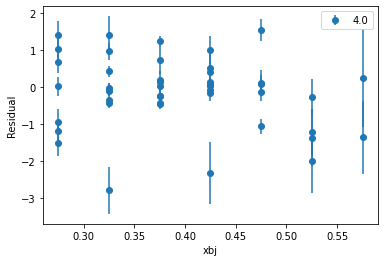

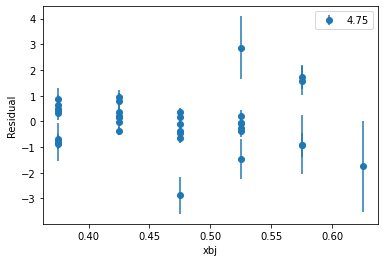

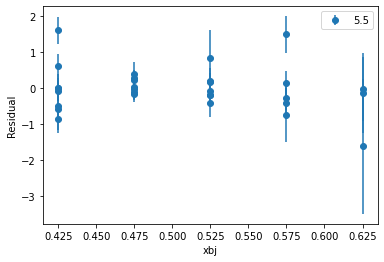

In [9]:
i_Q2 = 0

for key_Q2,Q2_value in RDxz.items():
    fig = plt.figure()
    
    zs = []
    xs = []
    RDs = []
    RDs_error = []
    Q2 = float(key_Q2)
    
    print(Q2)
    i_count = 0
    Residual = []
    Residual_count = []
    Residual_error = []
    for key_xbj,xbj_value in Q2_value.items():
        xbj = float(key_xbj) 
        for key_z,z_value in xbj_value.items():
            xs.append(xbj)
            z_hadron = float(key_z)
            zs.append(z_hadron)
            RD=float(z_value["value_ratio"])
            RD_error = float(z_value["error_ratio"])
            Residual_error.append(RD_error)
            
            RDmeas_CSV_fit = RDmeas_CSV(math.sqrt(Q2),z_hadron,Dz_as[i_Q2],Dz_bs[i_Q2],Dz_cs[i_Q2],Dz_ds[i_Q2],xbj,CSV_1s[i_Q2],CSV_2s[i_Q2],CSV_3s[i_Q2],CSV_4s[i_Q2],CSV_5s[i_Q2])
            Residual.append(RD-RDmeas_CSV_fit)
            Residual_count.append(i_count)
            i_count+=1
  
    #plt.plot(Residual_count,Residual,"P",label=Qs[i_Q2])
    plt.errorbar(xs,Residual,Residual_error,fmt='o',label = Qs[i_Q2])
    plt.xlabel("xbj")
    plt.ylabel("Residual")
    plt.legend()
    i_Q2+=1

In [10]:
print(len(Qs))
print("Dz parameters a,b,c,d")
for i in range(len(Qs)):
    
    print(Qs[i]," ",f"{Dz_as[i]:.5f}",f"{Dz_bs[i]:.5f}",f"{Dz_cs[i]:.5f}",f"{Dz_ds[i]:.5f}")
    print(" err "," ",f"{Dz_a_err[i]:.5f}",f"{Dz_b_err[i]:.5f}",f"{Dz_c_err[i]:.5f}",f"{Dz_d_err[i]:.5f}")
   
    #print(f"{Dz_a[i]:.5f} +- {Dz_a_err[i]:.5f}",f"{Dz_b[i]:.5f} +- {Dz_b_err[i]:.5f}",f"{Dz_c[i]:.5f} +- {Dz_c_err[i]:.5f}",f"{Dz_d[i]:.5f} +- {Dz_d_err[i]:.5f}")
    #print(Dz_a[i]+"\\pm" +Dz_a_err[i])

3
Dz parameters a,b,c,d
4.0   0.14806 1.00857 -0.70233 3.56261
 err    0.00023 0.00029 0.00126 0.00343
4.75   0.32790 1.28203 -0.17449 89.85443
 err    0.00000 0.00000 0.00000 0.00000
5.5   -1.57648 4.28066 -10.34516 6.17060
 err    0.14336 0.24548 1.47232 0.35973


In [11]:
print(len(Qs))
print("CSV parameters 1,2,3,4,5")
for i in range(len(Qs)):
    
    print(Qs[i]," ",f"{CSV_1s[i]:.5f}",f"{CSV_2s[i]:.5f}",f"{CSV_3s[i]:.5f}",f"{CSV_4s[i]:.5f}",f"{CSV_5s[i]:.5f}")
    print(" err "," ",f"{CSV_1_err[i]:.5f}",f"{CSV_2_err[i]:.5f}",f"{CSV_3_err[i]:.5f}",f"{CSV_4_err[i]:.5f}",f"{CSV_5_err[i]:.5f}")



3
CSV parameters 1,2,3,4,5
4.0   1.62026 1.68537 0.92207 -11.71654 0.41941
 err    0.00228 0.00371 0.00490 243.40218 13427.20982
4.75   1.59171 12.05619 16.71390 -74.74648 -0.92120
 err    0.00000 0.00000 0.00000 0.00000 0.00000
5.5   -9.55367 10.92555 43.59548 6.38054 -3.72039
 err    0.13919 0.19021 0.30525 0.04254 0.02846


Text(0, 0.5, 'xbj*CSV')

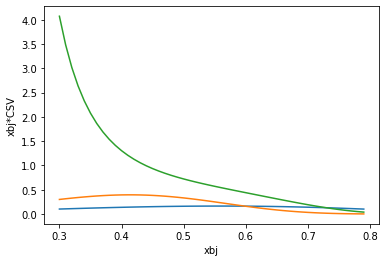

In [12]:
from iminuit.util import propagate

def CSVx(xbj,CSV_1,CSV_2,CSV_3,CSV_4,CSV_5):
    #return xbj**CSV_1*(1-xbj)**CSV_2*math.exp(CSV_3*xbj)*(1+math.exp(CSV_4)*xbj)**CSV_5 
    return xbj**CSV_1*(1-xbj)**CSV_2*math.exp(CSV_3*xbj)*(1+math.exp(CSV_4)*xbj)**CSV_5
for i in range(len(Qs)):
    x = np.arange(0.3,0.8,0.01)
    fit_CSV=[]
    for xbj in x:
        fit_CSV.append(CSVx(xbj,CSV_1s[i],CSV_2s[i],CSV_3s[i],CSV_4s[i],CSV_5s[i]))
    plt.plot(x,fit_CSV);        
plt.xlabel("xbj")
plt.ylabel("xbj*CSV")


No handles with labels found to put in legend.


Text(0, 0.5, 'deltaz')

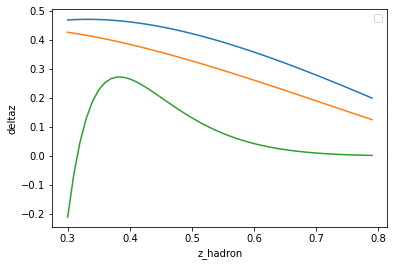

In [13]:
from iminuit.util import propagate

def delta_z(z_had,Dz_a,Dz_b,Dz_c,Dz_d):
    return z_had**Dz_a*(1-z_had)**Dz_b*(1+Dz_c*(1-z_had)**Dz_d)

for i in range(len(Qs)):
    
    zs = np.arange(0.3,0.8,0.01)
    fit_Deltaz=[]
    for z_hadron in zs:
        fit_Deltaz.append(delta_z(z_hadron,Dz_as[i],Dz_bs[i],Dz_cs[i],Dz_ds[i]))
    plt.plot(zs,fit_Deltaz);  
plt.legend()
plt.xlabel("z_hadron")
plt.ylabel("deltaz")